# Face Mask Detection

## Import all Dependencies

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

## Data Collection

In [4]:
# load the images wearing mask
# make a list of all the filenames in with_mask folder
with_mask_files = os.listdir('data/with_mask')

In [5]:
# first 5 file names
print(with_mask_files[0:5])
# last 5 file names
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [6]:
# load the images without mask 
# make a list of all the filenames in without_mask folder
without_mask_files = os.listdir('data/without_mask')

In [7]:
# first 5 file names
print(without_mask_files[0:5])
# first 5 file names
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [8]:
# Number of images of both type
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


### Label Data

In [9]:
# label dataset with mask as 1
with_mask_labels = [1]*len(with_mask_files)

# label dataset without mask as 0
without_mask_labels = [0]*len(without_mask_files)

In [10]:
# print first five with mask
print(with_mask_labels[0:5])
# print first five without mask
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
# adding both list together
labels = with_mask_labels + without_mask_labels

print(len(labels)) # totalimages
print(labels[0:5]) # first five
print(labels[-5:]) # last five

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Display Images

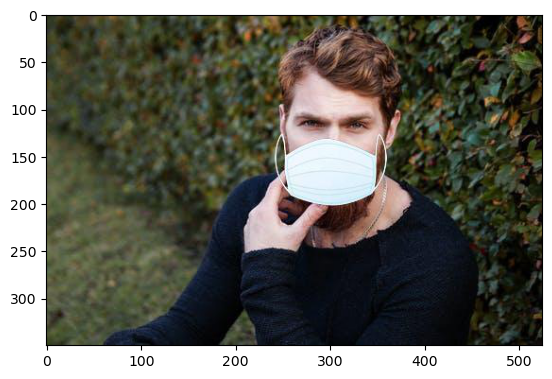

In [13]:
# display mask images
img = mpimg.imread('data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

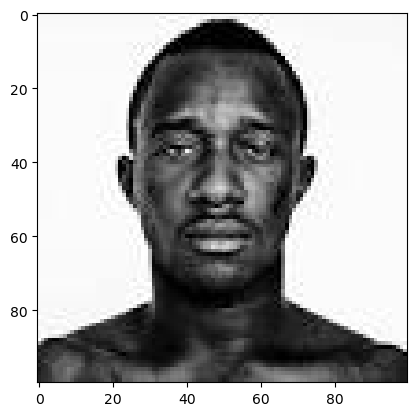

In [14]:
# display without mask images
img = mpimg.imread('data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image Processing

In [15]:
# numpy array of images
data = []

In [16]:
# path of with_mask images
with_mask_path = "data/with_mask/"

# iterate all the images in that folder
# convert into RGB and make numpy array
# add them into data
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128)) # resize all into same size
    image = image.convert("RGB")     # convert to RGB
    image = np.array(image)          # convert them into numpy array
    data.append(image)               # add that to data list

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
# path of without_mask images
without_mask_path = "data/without_mask/"


# iterate all the images in that folder
# convert into RGB and make numpy array
# add them into data
for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128)) # resize all into same size
    image = image.convert("RGB")     # convert to RGB
    image = np.array(image)          # convert them into numpy array
    data.append(image)               # add that to data list

In [18]:
# all the images are into data 
len(data)

7553

In [19]:
# check the type of each image
type(data[0])

numpy.ndarray

In [20]:
# shape of an image
data[0].shape

(128, 128, 3)

In [21]:
# print one image data
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [22]:
# convert images and labels into numpy array
X = np.array(data)
y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [25]:
# shape of data and label
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


### Split Train and Test data

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
# print the shape of features
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


### Data Scaling

In [28]:
# scaling data between 0 to 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
# before scaling
X_train[0]

array([[[225, 235, 198],
        [210, 216, 186],
        [189, 188, 169],
        ...,
        [187, 182, 165],
        [181, 174, 151],
        [165, 182, 133]],

       [[224, 228, 217],
        [202, 204, 195],
        [201, 199, 193],
        ...,
        [198, 190, 180],
        [177, 169, 154],
        [158, 182, 141]],

       [[205, 204, 214],
        [221, 219, 227],
        [195, 191, 197],
        ...,
        [183, 173, 174],
        [174, 165, 160],
        [174, 203, 166]],

       ...,

       [[155, 176, 199],
        [160, 180, 197],
        [165, 185, 195],
        ...,
        [ 88,  99,  71],
        [106, 113,  85],
        [ 99, 104,  63]],

       [[150, 177, 197],
        [168, 190, 208],
        [174, 192, 209],
        ...,
        [106, 113,  81],
        [ 99, 103,  67],
        [ 99,  99,  33]],

       [[160, 193, 210],
        [177, 198, 221],
        [175, 189, 214],
        ...,
        [103, 107,  70],
        [ 77,  81,  47],
        [ 99,  94,  63]]

In [30]:
# after scaling
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

### Model Building with Convolutional Neural Network

In [31]:
# CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))        
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [32]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [33]:
# model training
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 198s 1s/step - loss: 0.4493 - acc: 0.8034 - val_loss: 0.2823 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 191s 1s/step - loss: 0.2960 - acc: 0.8832 - val_loss: 0.2318 - val_acc: 0.9157
Epoch 3/5
170/170 [==============================] - 183s 1s/step - loss: 0.2349 - acc: 0.9112 - val_loss: 0.2044 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 188s 1s/step - loss: 0.1976 - acc: 0.9235 - val_loss: 0.2102 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 191s 1s/step - loss: 0.1702 - acc: 0.9356 - val_loss: 0.2004 - val_acc: 0.9388


### Model Evaluation

In [34]:
# loss and accuracy
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy', accuracy)

48/48 [==============================] - 8s 167ms/step - loss: 0.1742 - acc: 0.9378
Test Accuracy 0.9377895593643188


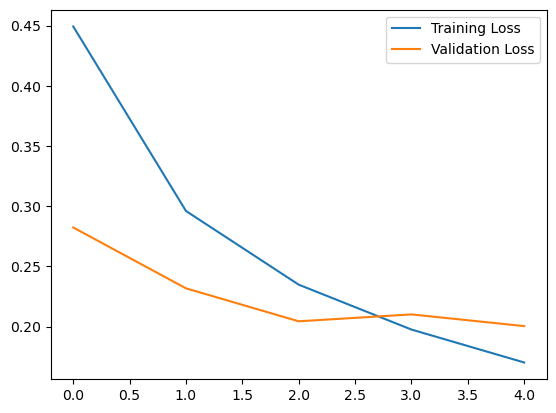

In [35]:
# Plot loss value
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.show()

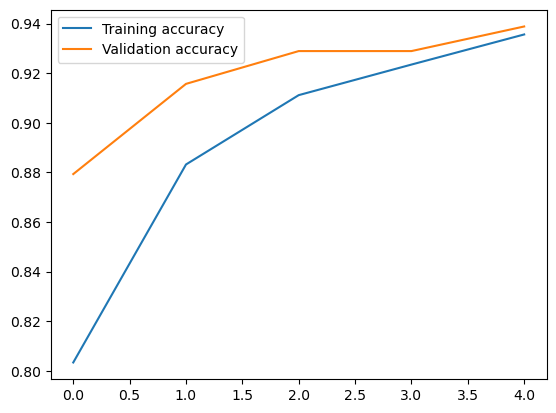

In [36]:
# Plot accuracy value
plt.plot(history.history['acc'], label="Training accuracy")
plt.plot(history.history['val_acc'], label="Validation accuracy")
plt.legend()
plt.show()

### Predictive System

Path of the image to be predicted: twm3.jpg
1/1 [==============================] - 0s 19ms/step
[[0.39852265 0.6435961 ]]
The person is wearing mask.


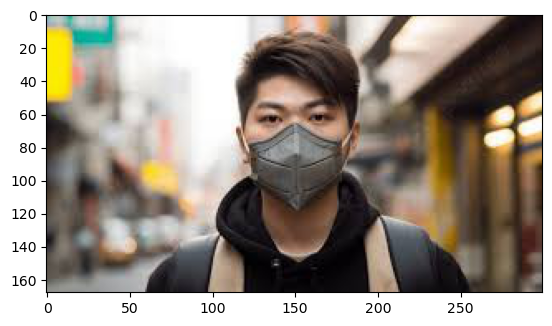

In [42]:
# take image path
input_image_path = input("Path of the image to be predicted: ")
# load that image
input_image = mpimg.imread(input_image_path)
# show image
plt.imshow(input_image)
# preprocess image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# predict
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# take maximum probability
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print("The person is wearing mask.")
else:
    print("The person is not wearing mask.")